In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import torch

from code.distributions import *


sns.set_style('whitegrid')

In [2]:
mortality_no_nodes = pd.read_csv('results/mortality_no_nodes.csv')
mortality_no_nodes_summary = mortality_no_nodes[mortality_no_nodes['experiment_type'].isnull()]

In [3]:
mortality_virtual = pd.read_csv('results/mortality_virtual.csv')
mortality_real = pd.read_csv('results/mortality_real.csv')
mortality = pd.concat([mortality_virtual, mortality_real, mortality_no_nodes])

In [4]:
def plot_mortality_train_size(data, title_part, metric, ylabel):
    fig = plt.gcf()
    fig.set_size_inches(15, 3)
    sns.pointplot(x='train_size', y=metric, hue='nodes_type', data=data, dodge=True)
    plt.title(f'Mortality prediction: {title_part} for varying training set sizes', fontsize=14)
    plt.xlabel('train size')
    plt.ylabel(ylabel)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig(f'./graphs/mortality_train_size/{metric}.png')
    plt.show()

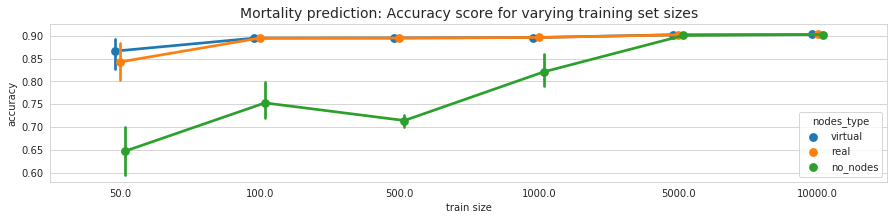

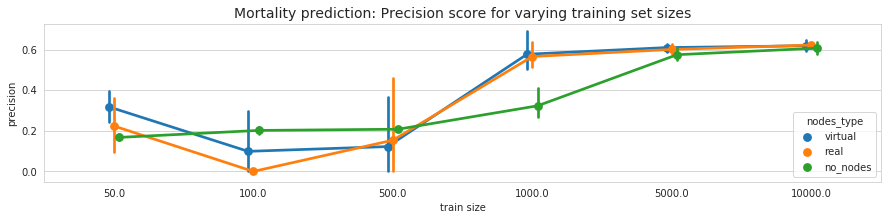

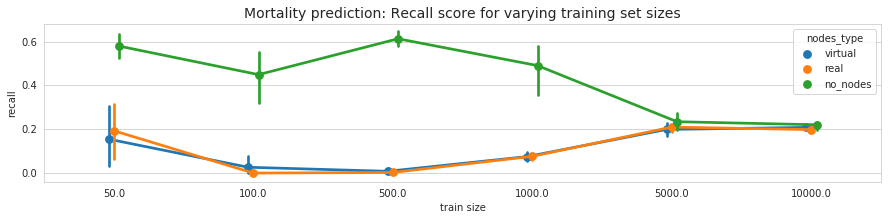

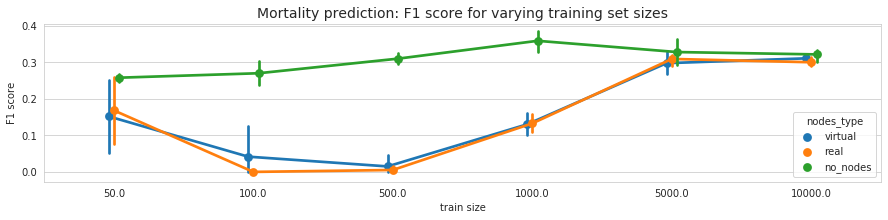

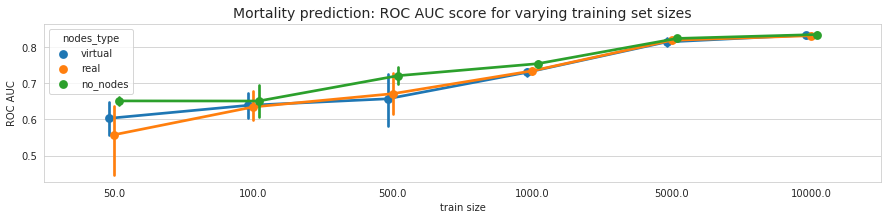

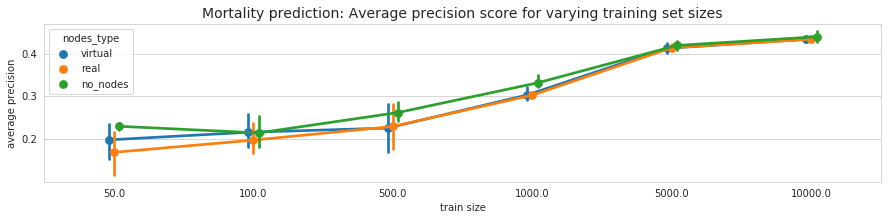

In [5]:
mortality_train_size = mortality[mortality['experiment_type'] == 'train size']
    
title_metric_ylabel_tuples = [
    ('Accuracy score', 'accuracy', 'accuracy'),
    ('Precision score', 'precision', 'precision'),
    ('Recall score', 'recall', 'recall'),
    ('F1 score', 'f1_score', 'F1 score'),
    ('ROC AUC score', 'roc_auc', 'ROC AUC'),
    ('Average precision score', 'average_precision', 'average precision')
]

for title, metric, ylabel in title_metric_ylabel_tuples:
    plot_mortality_train_size(mortality_train_size, title, metric, ylabel)

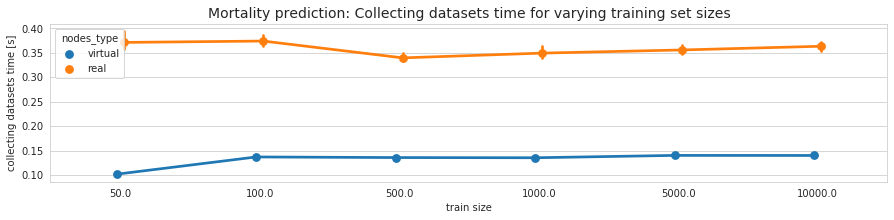

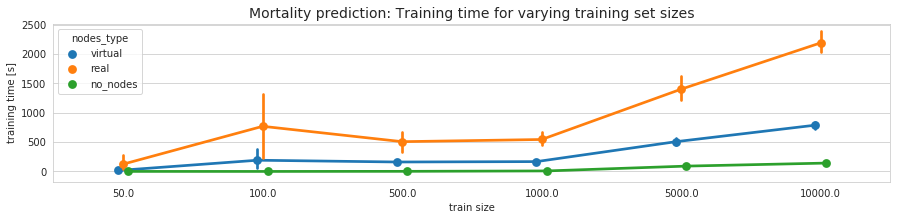

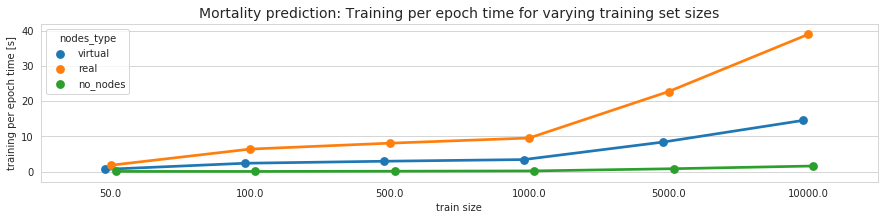

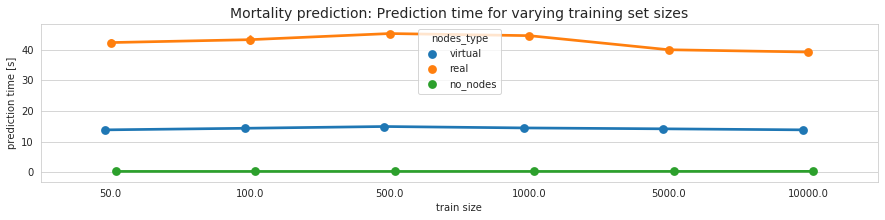

In [6]:
title_metric_ylabel_tuples = [
    ('Collecting datasets time', 'collecting_datasets', 'collecting datasets time [s]'),
    ('Training time', 'training', 'training time [s]'),
    ('Training per epoch time', 'training_per_epoch', 'training per epoch time [s]'),
    ('Prediction time', 'prediction', 'prediction time [s]')
]

for title, metric, ylabel in title_metric_ylabel_tuples:
    plot_data = mortality_train_size
    if metric == 'collecting_datasets':
        plot_data = plot_data[plot_data['nodes_type'] != 'no_nodes']
    plot_mortality_train_size(plot_data, title, metric, ylabel)

In [7]:
def plot_mortality_with_boxplot_aside(
        data,
        no_nodes_summary,
        experiment_type_col,
        title_part,
        metric,
        xlabel,
        ylabel,
        join_points=True
    ):
    fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize=(15,3), sharey=True)
    if metric != 'collecting_datasets':
        sns.pointplot(y=no_nodes_summary[metric], ax=a0, color=plt.cm.tab10(2))
        a0.set_xlabel('no nodes')
        a0.yaxis.set_tick_params(which='both')
        a0.set_ylabel(ylabel)
    else:
        a0.axis('off')
    sns.pointplot(
        x=experiment_type_col,
        y=metric,
        hue='nodes_type',
        data=data,
        ax=a1,
        dodge=True,
        join=join_points
    )
    a1.set_xlabel(xlabel)
    a1.set_ylabel(ylabel)
    a1.yaxis.set_tick_params(labelbottom=True)
    plt.suptitle(f'Mortality prediction: {title_part}', fontsize=14)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig(f'./graphs/mortality_{experiment_type_col}/{metric}.png')
    plt.show()

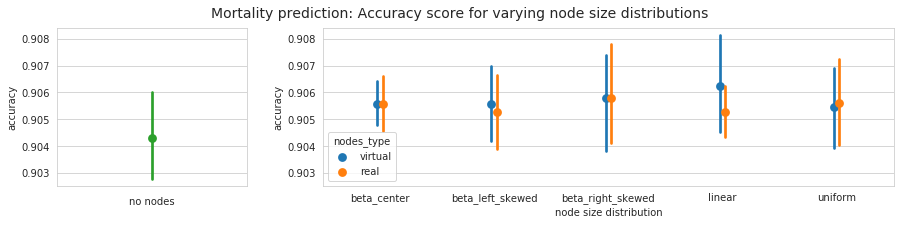

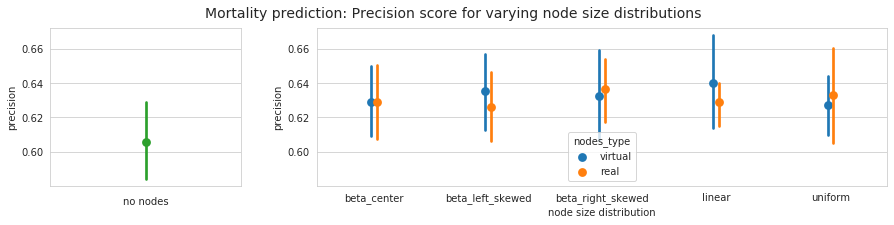

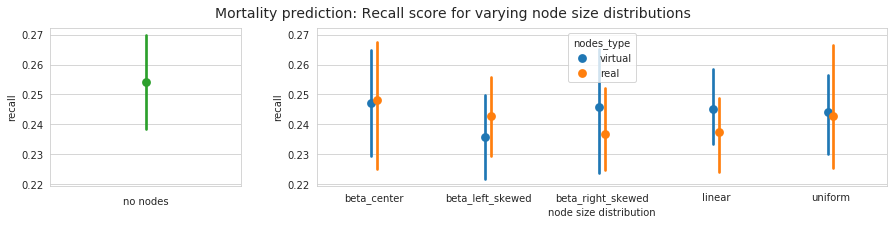

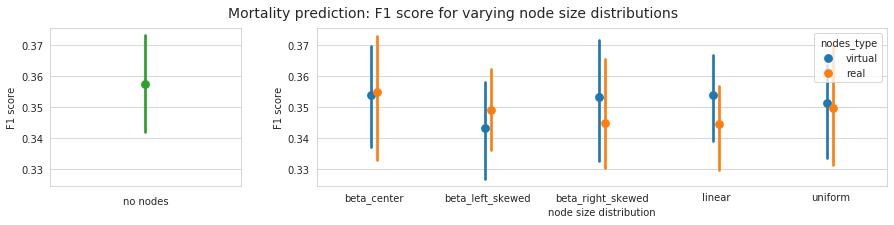

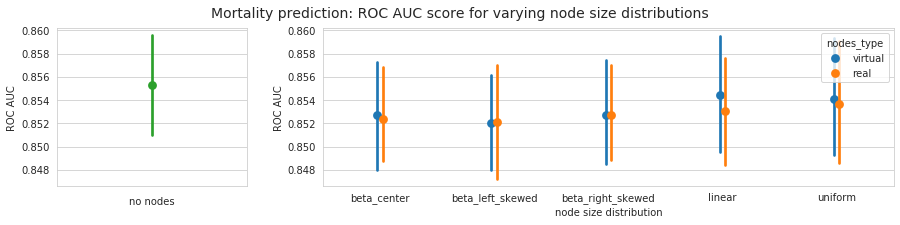

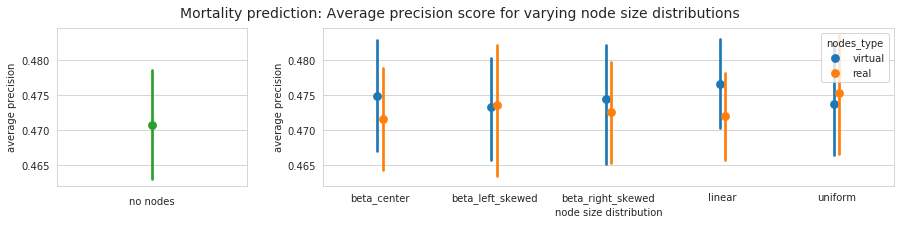

In [8]:
mortality_node_distribution = mortality[mortality['experiment_type'] == 'node distribution']

title_metric_ylabel_tuples = [
    ('Accuracy score for varying node size distributions ', 'accuracy', 'accuracy'),
    ('Precision score for varying node size distributions ', 'precision', 'precision'),
    ('Recall score for varying node size distributions ', 'recall', 'recall'),
    ('F1 score for varying node size distributions ', 'f1_score', 'F1 score'),
    ('ROC AUC score for varying node size distributions ', 'roc_auc', 'ROC AUC'),
    ('Average precision score for varying node size distributions ', 'average_precision', 'average precision')
]

for title, metric, ylabel in title_metric_ylabel_tuples:
    plot_mortality_with_boxplot_aside(
        mortality_node_distribution,
        mortality_no_nodes_summary,
        'node_distribution',
        title,
        metric,
        xlabel='node size distribution',
        ylabel=ylabel,
        join_points=False
    )

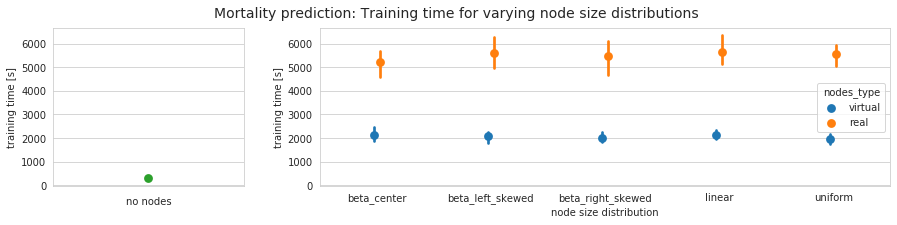

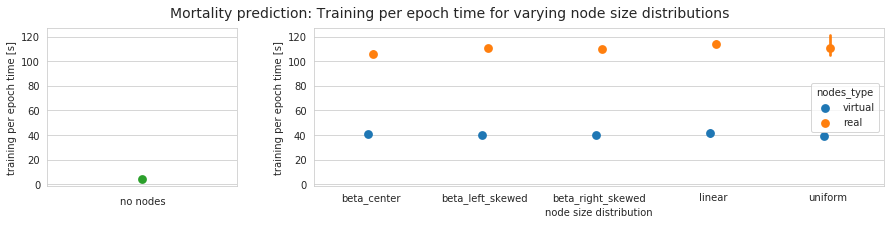

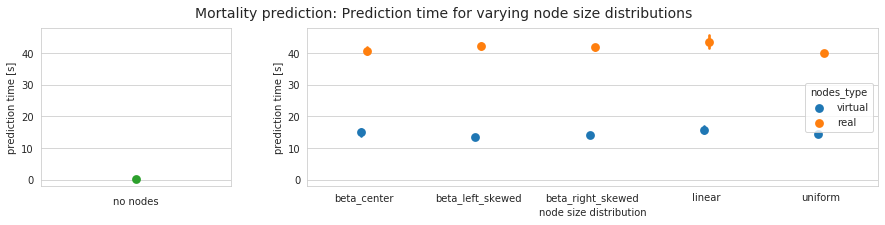

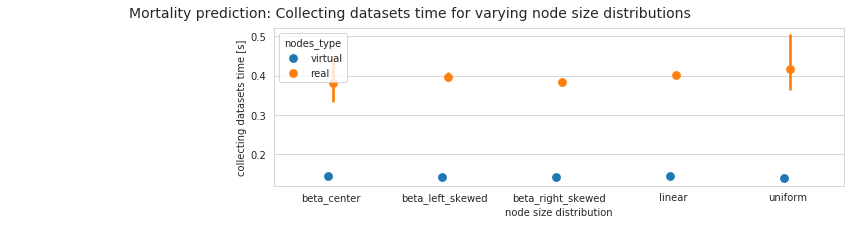

In [9]:
title_metric_ylabel_tuples = [
    ('Training time for varying node size distributions ', 'training', 'training time [s]'),
    ('Training per epoch time for varying node size distributions ', 'training_per_epoch', 'training per epoch time [s]'),
    ('Prediction time for varying node size distributions ', 'prediction', 'prediction time [s]'),
    ('Collecting datasets time for varying node size distributions ', 'collecting_datasets', 'collecting datasets time [s]')
]

for title, metric, ylabel in title_metric_ylabel_tuples:
    plot_mortality_with_boxplot_aside(
        mortality_node_distribution,
        mortality_no_nodes_summary,
        'node_distribution',
        title,
        metric,
        xlabel='node size distribution',
        ylabel=ylabel,
        join_points=False
    )

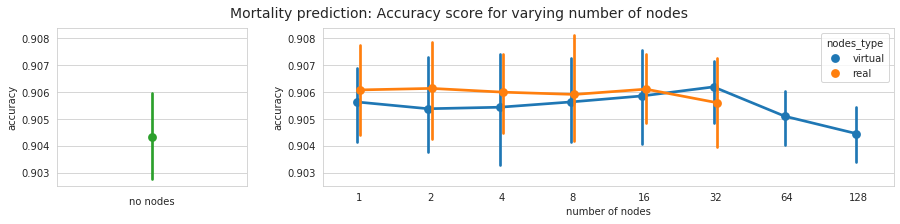

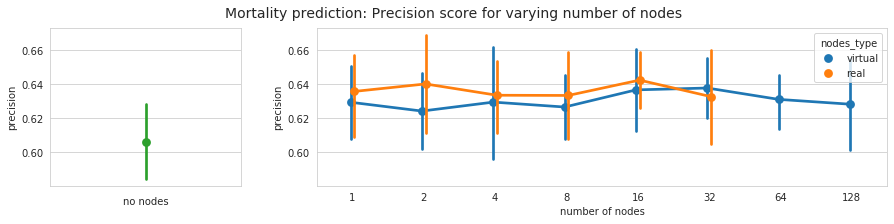

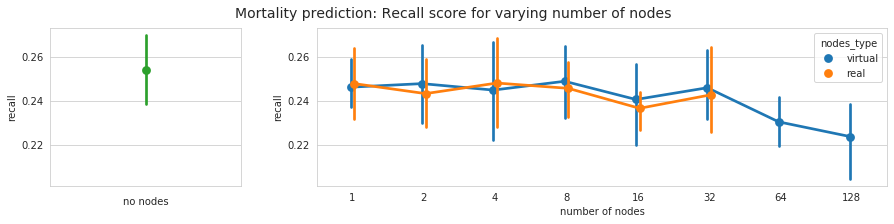

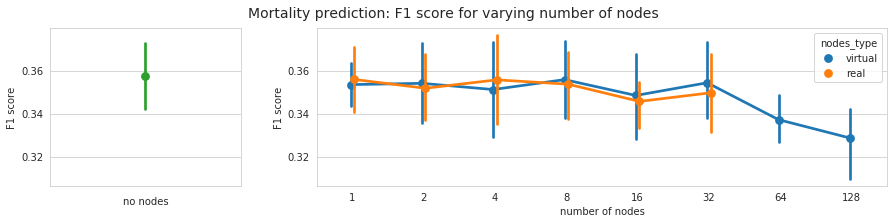

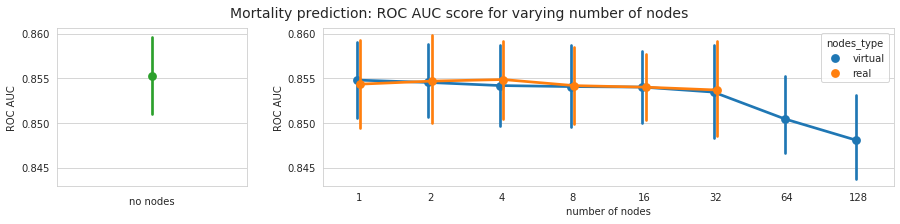

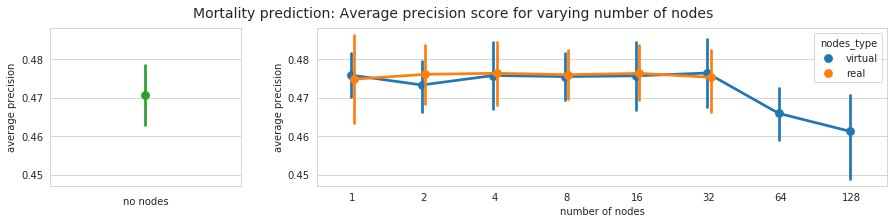

In [10]:
mortality_num_of_workers = mortality[mortality['experiment_type'] == 'num of workers']

title_metric_ylabel_tuples = [
    ('Accuracy score for varying number of nodes ', 'accuracy', 'accuracy'),
    ('Precision score for varying number of nodes ', 'precision', 'precision'),
    ('Recall score for varying number of nodes ', 'recall', 'recall'),
    ('F1 score for varying number of nodes ', 'f1_score', 'F1 score'),
    ('ROC AUC score for varying number of nodes ', 'roc_auc', 'ROC AUC'),
    ('Average precision score for varying number of nodes ', 'average_precision', 'average precision')
]

for title, metric, ylabel in title_metric_ylabel_tuples:
    plot_mortality_with_boxplot_aside(
        mortality_num_of_workers,
        mortality_no_nodes_summary,
        'num_of_workers',
        title,
        metric,
        xlabel='number of nodes',
        ylabel=ylabel,
    )

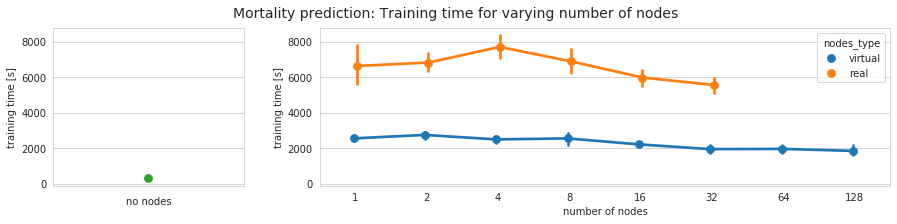

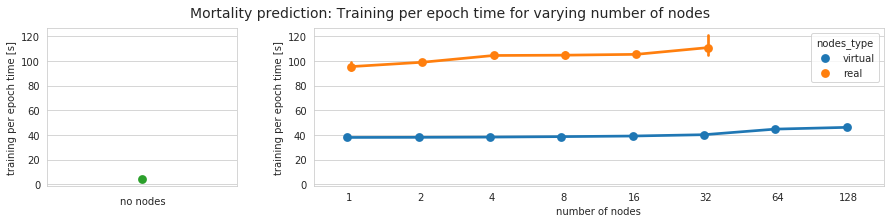

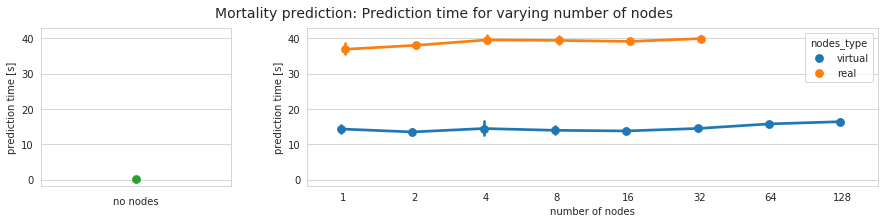

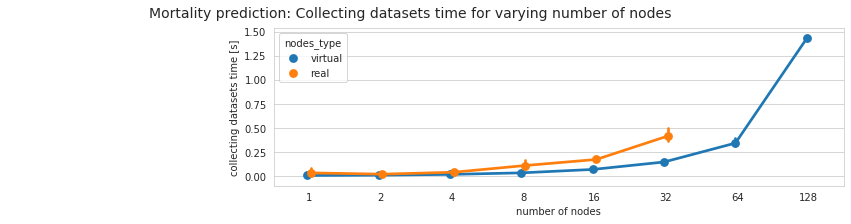

In [11]:
title_metric_ylabel_tuples = [
    ('Training time for varying number of nodes ', 'training', 'training time [s]'),
    ('Training per epoch time for varying number of nodes ', 'training_per_epoch', 'training per epoch time [s]'),
    ('Prediction time for varying number of nodes ', 'prediction', 'prediction time [s]'),
    ('Collecting datasets time for varying number of nodes ', 'collecting_datasets', 'collecting datasets time [s]')
]

for title, metric, ylabel in title_metric_ylabel_tuples:
    plot_mortality_with_boxplot_aside(
        mortality_num_of_workers,
        mortality_no_nodes_summary,
        'num_of_workers',
        title,
        metric,
        xlabel='number of nodes',
        ylabel=ylabel,
    )

## ICD-9

In [12]:
icd9_no_nodes = pd.read_csv('results/icd9_no_nodes.csv')
icd9_no_nodes_summary = icd9_no_nodes[icd9_no_nodes['experiment_type'].isnull()]
icd9_virtual = pd.read_csv('results/icd9_virtual.csv')

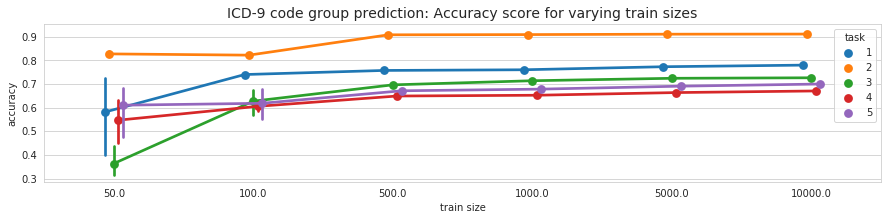

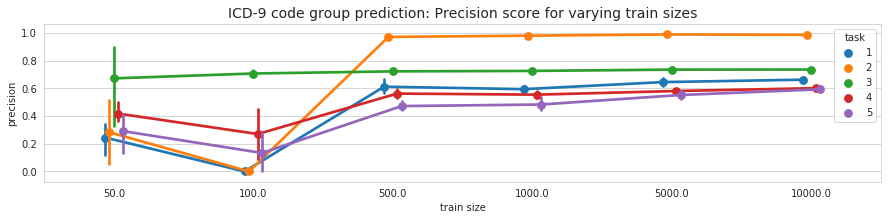

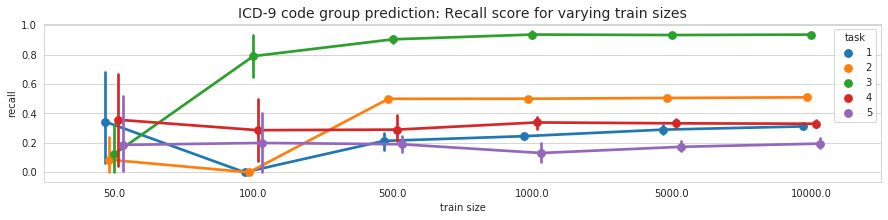

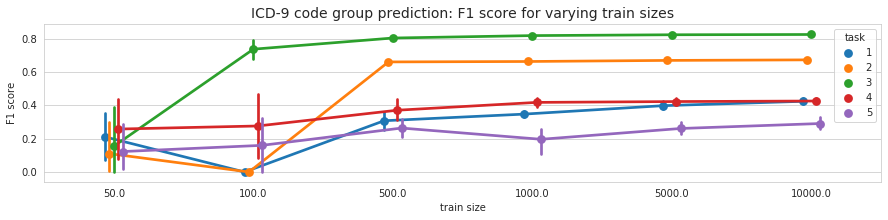

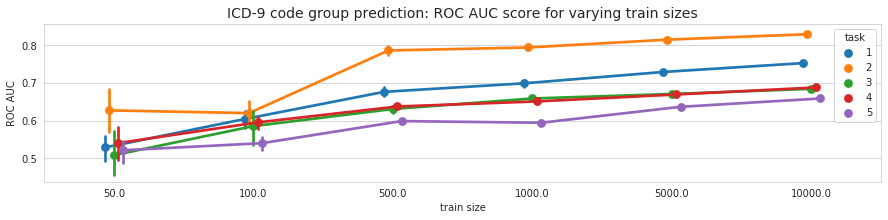

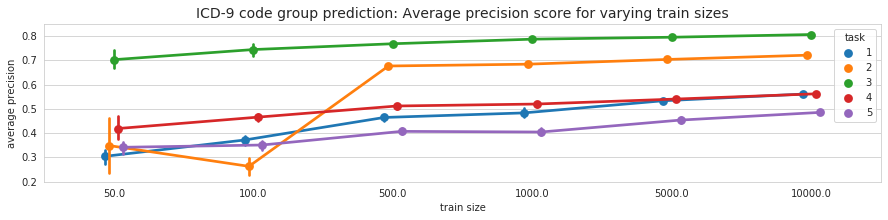

In [13]:
def plot_icd9_train_size_qualitive(data, title_part, metric, ylabel):
    fig = plt.gcf()
    fig.set_size_inches(15, 3)
    sns.pointplot(x='train_size', y=metric, hue='task', data=data, dodge=True)
    plt.title(f'ICD-9 code group prediction: {title_part} for varying train sizes', fontsize=14)
    plt.xlabel('train size')
    plt.ylabel(ylabel)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig(f'./graphs/icd9_train_size/{metric}.png')
    plt.show()

data = icd9_virtual[icd9_virtual['task'] <= 5]

title_metric_ylabel_tuples = [
    ('Accuracy score', 'accuracy', 'accuracy'),
    ('Precision score', 'precision', 'precision'),
    ('Recall score', 'recall', 'recall'),
    ('F1 score', 'f1_score', 'F1 score'),
    ('ROC AUC score', 'roc_auc', 'ROC AUC'),
    ('Average precision score', 'average_precision', 'average precision')
]

for title, metric, ylabel in title_metric_ylabel_tuples:
    plot_icd9_train_size_qualitive(data, title, metric, ylabel)

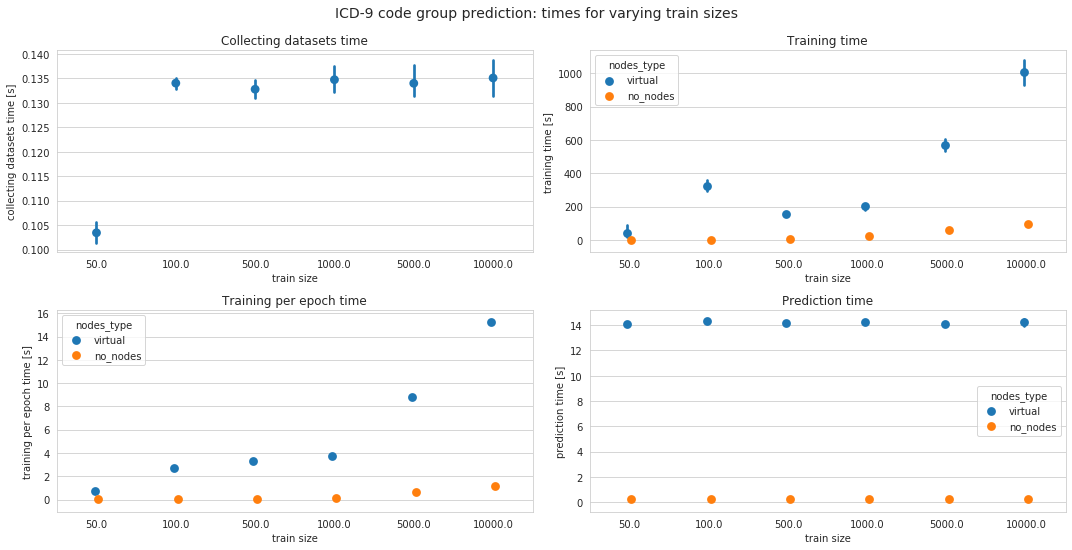

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))
# It does not matter which task we choose, they share the time measurements.
# However, it's important to choose only one task not to make the results too confident.
data_virtual = icd9_virtual[(icd9_virtual['task'] == 1) & (icd9_virtual['experiment_type'] == 'train size')]
data_no_nodes = icd9_no_nodes[(icd9_no_nodes['task'] == 1) & (icd9_no_nodes['experiment_type'] == 'train size')]

data = pd.concat([data_virtual, data_no_nodes])

title_metric_ylabel_tuples = [
    ('Collecting datasets time', 'collecting_datasets', 'collecting datasets time [s]'),
    ('Training time', 'training', 'training time [s]'),
    ('Training per epoch time', 'training_per_epoch', 'training per epoch time [s]'),
    ('Prediction time', 'prediction', 'prediction time [s]')
]

for ax, (title, metric, ylabel) in zip(axes.flat, title_metric_ylabel_tuples):
    if metric == 'collecting_datasets':
        sns.pointplot(x='train_size', y=metric, data=data_virtual, dodge=True, join=False, ax=ax)
    else:
        sns.pointplot(x='train_size', y=metric, data=data, hue='nodes_type', dodge=True, join=False, ax=ax)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('train size')
    ax.set_title(title)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(
    'ICD-9 code group prediction: times for varying train sizes',
    fontsize=14
)
plt.savefig(f'./graphs/icd9_train_size/times.png')
plt.show()

In [15]:
def plot_icd9_qualitive_with_benchmark_line(data, experiment_type_col, title_part, metric, xlabel, ylabel):
    fig = plt.gcf()
    fig.set_size_inches(15, 3)
    sns.pointplot(x=experiment_type_col, y=metric, hue='task', data=data, join=False, dodge=True)
    plt.title('ICD-9 code group prediction: ' + title_part , fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig(f'./graphs/icd9_{experiment_type_col}/{metric}.png')
    plt.show()

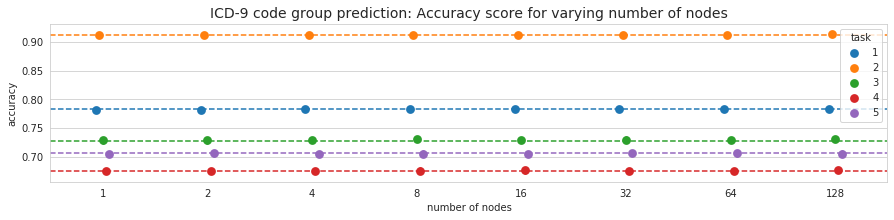

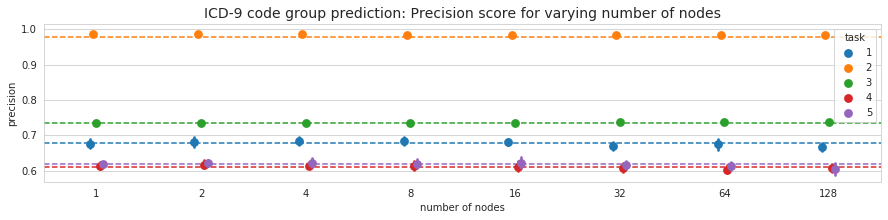

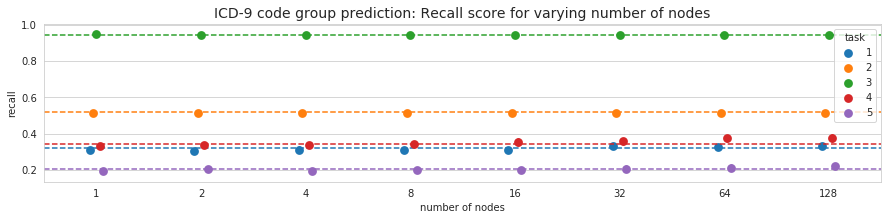

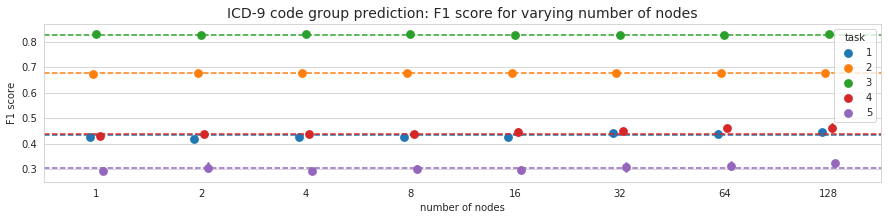

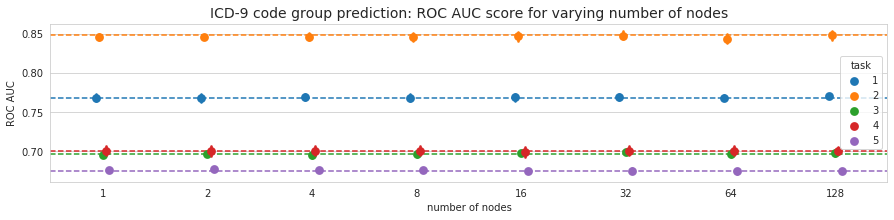

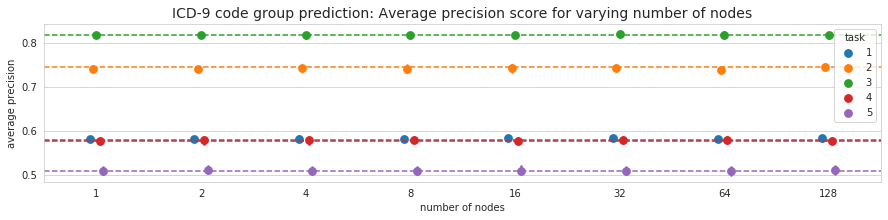

In [16]:
data = icd9_virtual[(icd9_virtual['task'] <= 5) & (icd9_virtual['experiment_type'] == 'num of workers')]

title_metric_ylabel_tuples = [
    ('Accuracy score for varying number of nodes', 'accuracy', 'accuracy'),
    ('Precision score for varying number of nodes', 'precision', 'precision'),
    ('Recall score for varying number of nodes', 'recall', 'recall'),
    ('F1 score for varying number of nodes', 'f1_score', 'F1 score'),
    ('ROC AUC score for varying number of nodes', 'roc_auc', 'ROC AUC'),
    ('Average precision score for varying number of nodes', 'average_precision', 'average precision')
]

tasks = list(range(1, 6))

for title, metric, ylabel in title_metric_ylabel_tuples:
    for task in tasks:
        task_benchmark = icd9_no_nodes_summary[icd9_no_nodes_summary['task'] == task][metric].mean()
        plt.axhline(task_benchmark, linestyle='--', c=plt.cm.tab10(task - 1))
    plot_icd9_qualitive_with_benchmark_line(
        data,
        'num_of_workers',
        title,
        metric,
        xlabel='number of nodes',
        ylabel=ylabel
    )

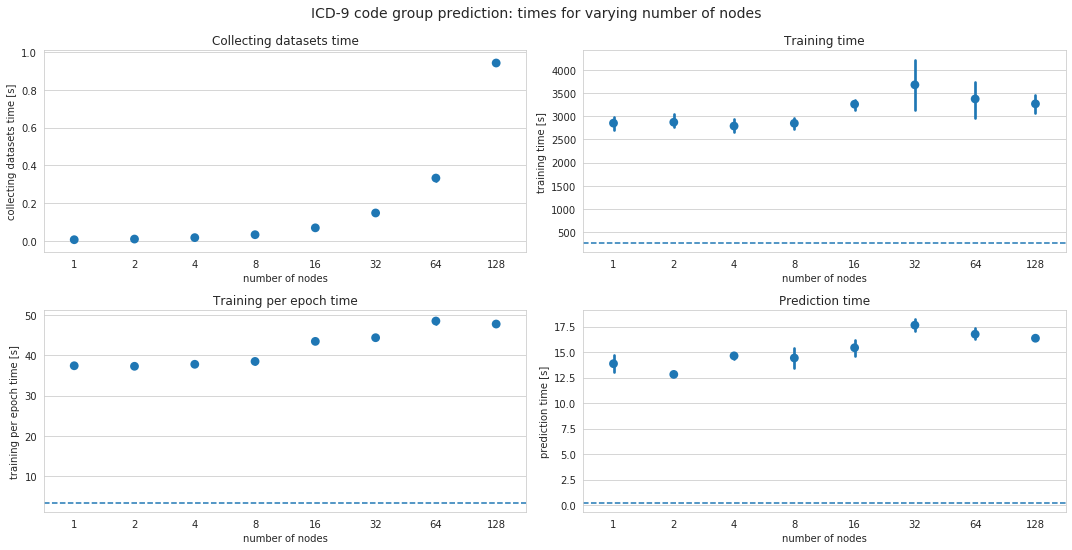

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))
data_virtual = icd9_virtual[(icd9_virtual['task'] == 1) & (icd9_virtual['experiment_type'] == 'num of workers')]
data_no_nodes = icd9_no_nodes_summary[icd9_no_nodes_summary['task'] == 1]

title_metric_ylabel_tuples = [
    ('Collecting datasets time', 'collecting_datasets', 'collecting datasets time [s]'),
    ('Training time', 'training', 'training time [s]'),
    ('Training per epoch time', 'training_per_epoch', 'training per epoch time [s]'),
    ('Prediction time', 'prediction', 'prediction time [s]')
]

for ax, (title, metric, ylabel) in zip(axes.flat, title_metric_ylabel_tuples):
    sns.pointplot(x='num_of_workers', y=metric, data=data_virtual, dodge=True, join=False, ax=ax)
    if metric != 'collecting_datasets':
        ax.axhline(data_no_nodes[metric].mean(), linestyle='--')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('number of nodes')
    ax.set_title(title)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(
    'ICD-9 code group prediction: times for varying number of nodes',
    fontsize=14
)
plt.savefig(f'./graphs/icd9_num_of_workers/times.png')
plt.show()

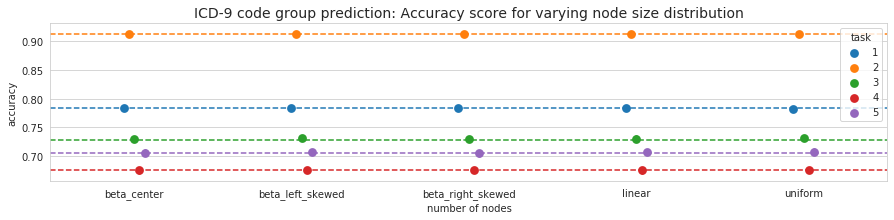

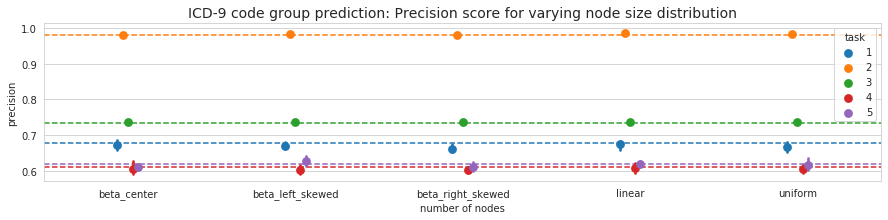

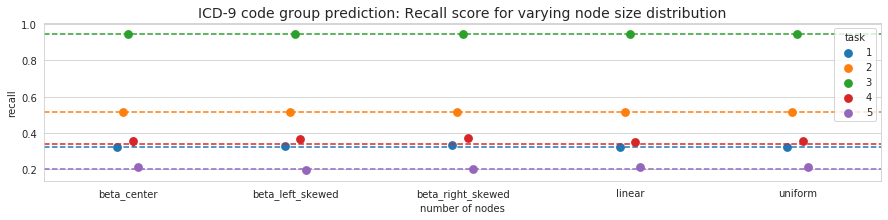

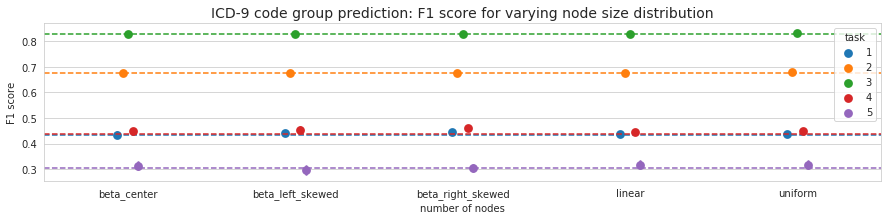

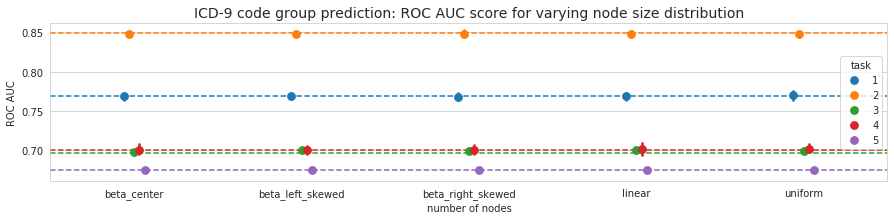

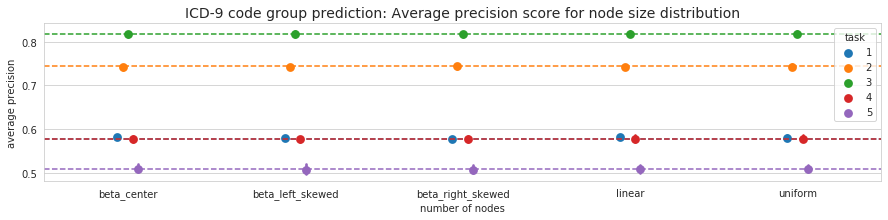

In [18]:
data = icd9_virtual[(icd9_virtual['task'] <= 5) & (icd9_virtual['experiment_type'] == 'node distribution')]

title_metric_ylabel_tuples = [
    ('Accuracy score for varying node size distribution', 'accuracy', 'accuracy'),
    ('Precision score for varying node size distribution', 'precision', 'precision'),
    ('Recall score for varying node size distribution', 'recall', 'recall'),
    ('F1 score for varying node size distribution', 'f1_score', 'F1 score'),
    ('ROC AUC score for varying node size distribution', 'roc_auc', 'ROC AUC'),
    ('Average precision score for node size distribution', 'average_precision', 'average precision')
]

tasks = list(range(1, 6))

for title, metric, ylabel in title_metric_ylabel_tuples:
    for task in tasks:
        task_benchmark = icd9_no_nodes_summary[icd9_no_nodes_summary['task'] == task][metric].mean()
        plt.axhline(task_benchmark, linestyle='--', c=plt.cm.tab10(task - 1))
    plot_icd9_qualitive_with_benchmark_line(
        data,
        'node_distribution',
        title,
        metric,
        xlabel='number of nodes',
        ylabel=ylabel
    )

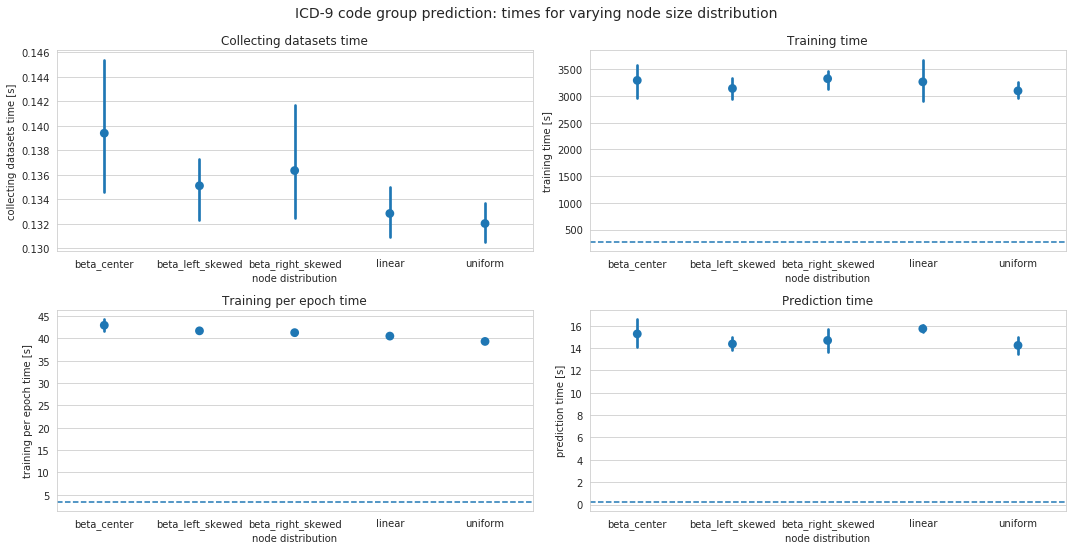

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))
data_virtual = icd9_virtual[(icd9_virtual['task'] == 1) & (icd9_virtual['experiment_type'] == 'node distribution')]
data_no_nodes = icd9_no_nodes_summary[icd9_no_nodes_summary['task'] == 1]

title_metric_ylabel_tuples = [
    ('Collecting datasets time', 'collecting_datasets', 'collecting datasets time [s]'),
    ('Training time', 'training', 'training time [s]'),
    ('Training per epoch time', 'training_per_epoch', 'training per epoch time [s]'),
    ('Prediction time', 'prediction', 'prediction time [s]')
]

for ax, (title, metric, ylabel) in zip(axes.flat, title_metric_ylabel_tuples):
    sns.pointplot(x='node_distribution', y=metric, data=data_virtual, dodge=True, join=False, ax=ax)
    if metric != 'collecting_datasets':
        ax.axhline(data_no_nodes[metric].mean(), linestyle='--')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('node distribution')
    ax.set_title(title)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(
    'ICD-9 code group prediction: times for varying node size distribution',
    fontsize=14
)
plt.savefig(f'./graphs/icd9_node_distribution/times.png')
plt.show()